<a href="https://colab.research.google.com/github/prasadv26/ragents-lab/blob/main/multi_modal_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain
!pip install langchain-openai
!pip install langchain-community
!pip install langchain-chroma
!pip install redis

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
!pip install "unstructured[all-docs]"

In [ ]:
# install OCR dependencies for unstructured
!sudo apt-get install tesseract-ocr
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 44 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.10).
0 upgraded, 0 newly installed, 0 to remove and 44 not upgraded.


**Data Loading & Processing**
Partition PDF tables, text, and images

In [ ]:
from langchain_community.document_loaders import UnstructuredPDFLoader

doc = '/content/IF10244.pdf'
# Extract tables
# takes 1-2 min on Colab
loader = UnstructuredPDFLoader(file_path=doc,
                               strategy='hi_res',
                               extract_images_in_pdf=True,
                               infer_table_structure=True,
                               mode='elements',
                               image_output_dir_path='/content/figures')
data = loader.load()
data

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


[Document(metadata={'source': '/content/IF10244.pdf', 'coordinates': {'points': ((np.float64(160.0), np.float64(1.9444444444445708)), (np.float64(160.0), np.float64(257.63888888888886)), (np.float64(1539.6944444444443), np.float64(257.63888888888886)), (np.float64(1539.6944444444443), np.float64(1.9444444444445708))), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'last_modified': '2025-09-22T14:41:33', 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'image_path': '/content/figures/figure-1-1.jpg', 'file_directory': '/content', 'filename': 'IF10244.pdf', 'category': 'Image', 'element_id': '12c9f5a95f90b033a037021b22372f44'}, page_content='a. aa = Informing the legislative debate since 1914 Congressional Research Service'),
 Document(metadata={'source': '/content/IF10244.pdf', 'detection_class_prob': 0.5399559736251831, 'coordinates': {'points': ((np.float64(1297.505615234375), np.float64(259.0060119628906)), (np.float64(1297.505615234375), 

In [ ]:
len(data)

49

In [ ]:
[doc.metadata['category'] for doc in data if doc.metadata['category'] == 'Table']

['Table', 'Table']

In [ ]:
tables = [doc for doc in data if doc.metadata['category'] == 'Table']

In [ ]:
tables

[Document(metadata={'source': '/content/IF10244.pdf', 'detection_class_prob': 0.9196202158927917, 'coordinates': {'points': ((np.float64(165.472412109375), np.float64(1271.2808837890625)), (np.float64(165.472412109375), np.float64(1967.2716064453125)), (np.float64(820.37255859375), np.float64(1967.2716064453125)), (np.float64(820.37255859375), np.float64(1271.2808837890625))), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'last_modified': '2025-09-22T14:41:33', 'text_as_html': '<table><thead><tr><th></th><th>2018</th><th>2019</th><th>2020</th><th>2021</th><th>2022</th></tr></thead><tbody><tr><td colspan="6">Number of Fires (thousands)</td></tr><tr><td>Federal</td><td>12.5</td><td>10.9</td><td>14.4</td><td>14.0</td><td>11.7</td></tr><tr><td>FS</td><td>5.6</td><td>5.3</td><td>6.7</td><td>6.2</td><td>59</td></tr><tr><td>Dol</td><td>7.0</td><td>5.3</td><td>7.6</td><td>7.6</td><td>5.8</td></tr><tr><td>Other</td><td>0.1</td><td>0.2</td><td>&lt;0.1</td><td>0.2</td><td>

In [ ]:
data[5]

Document(metadata={'source': '/content/IF10244.pdf', 'coordinates': {'points': ((np.float64(869.9999999999999), np.float64(413.7499999999998)), (np.float64(869.9999999999999), np.float64(768.4722222222222)), (np.float64(1529.9999999999998), np.float64(768.4722222222222)), (np.float64(1529.9999999999998), np.float64(413.7499999999998))), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'last_modified': '2025-09-22T14:41:33', 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'image_path': '/content/figures/figure-1-2.jpg', 'file_directory': '/content', 'filename': 'IF10244.pdf', 'category': 'Image', 'element_id': '5e04433090c10f91e1a0bb2440a824be'}, page_content='Acres burned, millions Fires, thousands 120 Fires 100 \\')

In [ ]:
from IPython.display import HTML, display, Markdown

In [ ]:
print(data[12].page_content)

2018 2019 2020 Number of Fires (thousands) Federal 12.5 10.9 14.4 FS 5.6 5.3 6.7 DOI 7.0 5.3 7.6 2021 14.0 6.2 7.6 11.7 5.9 5.8 Other 0.1 0.2 <0.1 0.2 0.1 Nonfederal 45.6 39.6 44.6 45.0 57.2 Total 58.1 50.5 59.0 59.0 69.0 Acres Burned (millions) Federal 4.6 3.1 7.1 5.2 4.0 FS 2.3 0.6 4.8 4.1 1.9 DOI 2.3 2.3 2.3 1.0 2.1 Other <0.1 <0.1 <0.1 <0.1 <0.1 Nonfederal 4.1 1.6 3.1 1.9 3.6 Total 8.8 4.7 10.1 7.1 7.6


In [ ]:
[doc.metadata['category'] for doc in data]

['Image',
 'NarrativeText',
 'Title',
 'NarrativeText',
 'FigureCaption',
 'Image',
 'NarrativeText',
 'FigureCaption',
 'NarrativeText',
 'NarrativeText',
 'Title',
 'Title',
 'Table',
 'UncategorizedText',
 'UncategorizedText',
 'Image',
 'FigureCaption',
 'NarrativeText',
 'NarrativeText',
 'UncategorizedText',
 'NarrativeText',
 'NarrativeText',
 'Header',
 'NarrativeText',
 'Title',
 'NarrativeText',
 'Title',
 'FigureCaption',
 'Image',
 'NarrativeText',
 'Title',
 'FigureCaption',
 'NarrativeText',
 'Title',
 'Image',
 'Table',
 'NarrativeText',
 'Title',
 'NarrativeText',
 'Title',
 'NarrativeText',
 'FigureCaption',
 'NarrativeText',
 'Title',
 'NarrativeText',
 'UncategorizedText',
 'Title',
 'NarrativeText',
 'NarrativeText']

In [ ]:
!pip install htmltabletomd

In [ ]:
import htmltabletomd

md_table = htmltabletomd.convert_table(data[12].metadata['text_as_html'])
print(md_table)

|  | 2018 | 2019 | 2020 | 2021 | 2022 |
| :--- | :--- | :--- | :--- | :--- | :--- |
| Number of Fires (thousands) |
| Federal | 12.5 | 10.9 | 14.4 | 14.0 | 11.7 |
| FS | 5.6 | 5.3 | 6.7 | 6.2 | 59 |
| Dol | 7.0 | 5.3 | 7.6 | 7.6 | 5.8 |
| Other | 0.1 | 0.2 | &lt;0.1 | 0.2 | 0.1 |
| Nonfederal | 45.6 | 39.6 | 44.6 | 45.0 | $7.2 |
| Total | 58.1 | 50.5 | 59.0 | 59.0 | 69.0 |
| Acres Burned (millions) |
| Federal | 4.6 | 3.1 | 7.1 | 5.2 | 40 |
| FS | 2.3 | 0.6 | 48 | 41 | 19 |
| Dol | 2.3 | 2.3 | 2.3 | 1.0 | 2.1 |
| Other | &lt;0.1 | &lt;0.1 | &lt;0.1 | &lt;0.1 | &lt;0.1 |
| Nonfederal | 4.1 | 1.6 | 3.1 | Lg | 3.6 |
| Total | 8.8 | 4.7 | 10.1 | 7.1 | 7.6 |



**Separate Data into Text and Table Elements**

In [ ]:
docs = []
tables = []

for doc in data:
  if doc.metadata['category'] =='Table':
    tables.append(doc)
  elif doc.metadata['category'] =='NarrativeText':
    docs.append(doc)
  elif doc.metadata['category'] =='Title':
    docs.append(doc)
  elif doc.metadata['category'] =='FigureCaption':
    docs.append(doc)
  elif doc.metadata['category'] =='UncategorizedText':
    docs.append(doc)
  elif doc.metadata['category'] =='Header':
    docs.append(doc)

In [ ]:
print(len(docs))
print(len(tables))

42
2


Convert HTML Tables to Markdown

In [ ]:
for table in tables:
    table.page_content = htmltabletomd.convert_table(table.metadata['text_as_html'])

In [ ]:
for table in tables:
    print(table.page_content)
    print()

|  | 2018 | 2019 | 2020 | 2021 | 2022 |
| :--- | :--- | :--- | :--- | :--- | :--- |
| Number of Fires (thousands) |
| Federal | 12.5 | 10.9 | 14.4 | 14.0 | 11.7 |
| FS | 5.6 | 5.3 | 6.7 | 6.2 | 59 |
| Dol | 7.0 | 5.3 | 7.6 | 7.6 | 5.8 |
| Other | 0.1 | 0.2 | &lt;0.1 | 0.2 | 0.1 |
| Nonfederal | 45.6 | 39.6 | 44.6 | 45.0 | $7.2 |
| Total | 58.1 | 50.5 | 59.0 | 59.0 | 69.0 |
| Acres Burned (millions) |
| Federal | 4.6 | 3.1 | 7.1 | 5.2 | 40 |
| FS | 2.3 | 0.6 | 48 | 41 | 19 |
| Dol | 2.3 | 2.3 | 2.3 | 1.0 | 2.1 |
| Other | &lt;0.1 | &lt;0.1 | &lt;0.1 | &lt;0.1 | &lt;0.1 |
| Nonfederal | 4.1 | 1.6 | 3.1 | Lg | 3.6 |
| Total | 8.8 | 4.7 | 10.1 | 7.1 | 7.6 |


|  | 2019 | 2020 | 2021 | 2022 |
| :--- | :--- | :--- | :--- | :--- |
| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |
| % Residences | 46% | 54% | 60% | 46% |




In [ ]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


In [ ]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

In [ ]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name='gpt-4o', temperature=0)

Text and Table summaries

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.runnables import RunnablePassthrough

# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text particularly for semantic retrieval.
These summaries will be embedded and used to retrieve the raw text or table elements
Give a detailed summary of the table or text below that is well optimized for retrieval.
For any tables also add in a one line description of what the table is about besides the summary.
Do not add redundant words like Summary.
Just output the actual summary content.

Table or text chunk:
{element}
"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
summarize_chain = (
                    {"element": RunnablePassthrough()}
                      |
                    prompt
                      |
                    chatgpt
                      |
                    StrOutputParser() # extracts the response as text and returns it as a string
)

# Initialize empty summaries
text_summaries = []
table_summaries = []

text_docs = [doc.page_content for doc in docs]
table_docs = [table.page_content for table in tables]

text_summaries = summarize_chain.batch(text_docs, {"max_concurrency": 5})
table_summaries = summarize_chain.batch(table_docs, {"max_concurrency": 5})

len(text_summaries), len(table_summaries)

(42, 2)

In [ ]:
data[10]

Document(metadata={'source': '/content/IF10244.pdf', 'detection_class_prob': 0.6960996389389038, 'coordinates': {'points': ((np.float64(867.7382202148438), np.float64(1142.3544921875)), (np.float64(867.7382202148438), np.float64(1203.2511111111112)), (np.float64(1452.7354736328125), np.float64(1203.2511111111112)), (np.float64(1452.7354736328125), np.float64(1142.3544921875))), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'last_modified': '2025-09-22T14:41:33', 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'file_directory': '/content', 'filename': 'IF10244.pdf', 'category': 'Title', 'element_id': '47dea21d56cecd0a25ef3cb159d9b6f2'}, page_content='Figure 2. Top Five Years with Largest Wildfire Acreage Burned Since 1960')

In [ ]:
text_summaries[7]

'As of June 1, 2023, approximately 18,300 wildfires have affected more than 511,000 acres. This data provides insight into the scale and impact of wildfires in 2023.'

Image Summaey

In [ ]:
import base64
import os

from langchain_core.messages import HumanMessage


def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


def image_summarize(img_base64, prompt):
    """Make image summary"""
    chat = ChatOpenAI(model="gpt-4o", temperature=0)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content


def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval.
                Remember these images could potentially contain graphs, charts or tables also.
                These summaries will be embedded and used to retrieve the raw image for question answering.
                Give a detailed summary of the image that is well optimized for retrieval.
                Do not add additional words like Summary, This image represents, etc.
             """

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            img_base64_list.append(base64_image)
            image_summaries.append(image_summarize(base64_image, prompt))

    return img_base64_list, image_summaries


# Image summaries
IMG_PATH = './figures'
imgs_base64, image_summaries = generate_img_summaries(IMG_PATH)

In [ ]:
image_summaries

['Congressional Research Service logo featuring a stylized Capitol dome on the left. The text "Congressional Research Service" is prominently displayed, followed by the tagline "Informing the legislative debate since 1914." On the right, a blue box contains the words "IN FOCUS." The design uses a blue and white color scheme.',
 'Line and area chart depicting the number of fires and acres burned in the U.S. from 1993 to 2022. The left y-axis represents fires in thousands, while the right y-axis shows acres burned in millions. The x-axis spans the years 1993 to 2022. A red line indicates the number of fires, peaking around 1996 and 2006, with fluctuations throughout the period. A gray shaded area represents acres burned, with notable peaks around 2006, 2012, and 2020. The chart highlights trends in fire occurrences and the extent of land affected over nearly three decades.',
 'Bar chart displaying data on acres burned and number of fires for specific years. The years listed are 2015, 202

In [ ]:
len(image_summaries)

5

Download and Install Redis as a DocStore

In [ ]:
%%sh
curl -fsSL https://packages.redis.io/gpg | sudo gpg --dearmor -o /usr/share/keyrings/redis-archive-keyring.gpg
echo "deb [signed-by=/usr/share/keyrings/redis-archive-keyring.gpg] https://packages.redis.io/deb $(lsb_release -cs) main" | sudo tee /etc/apt/sources.list.d/redis.list
sudo apt-get update  > /dev/null 2>&1
sudo apt-get install redis-stack-server  > /dev/null 2>&1
redis-stack-server --daemonize yes

deb [signed-by=/usr/share/keyrings/redis-archive-keyring.gpg] https://packages.redis.io/deb jammy main
Starting redis-stack-server, database path /var/lib/redis-stack


gpg: cannot open '/dev/tty': No such device or address
curl: (23) Failed writing body


Open AI Embedding Models

In [ ]:
from langchain_openai import OpenAIEmbeddings

# details here: https://openai.com/blog/new-embedding-models-and-api-updates
openai_embed_model = OpenAIEmbeddings(model='text-embedding-3-small')

Multi-vector retriever

In [ ]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_community.storage import RedisStore
from langchain_community.utilities.redis import get_client
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings


def create_multi_vector_retriever(
    docstore, vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images
):
    """
    Create retriever that indexes summaries, but returns raw images or texts
    """


    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=docstore,
        id_key=id_key,
    )

    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):
        doc_ids = [str(uuid.uuid4()) for _ in doc_contents]
        summary_docs = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(doc_summaries)
        ]
        retriever.vectorstore.add_documents(summary_docs)
        retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    # Add texts, tables, and images
    # Check that text_summaries is not empty before adding
    if text_summaries:
        add_documents(retriever, text_summaries, texts)
    # Check that table_summaries is not empty before adding
    if table_summaries:
        add_documents(retriever, table_summaries, tables)
    # Check that image_summaries is not empty before adding
    if image_summaries:
        add_documents(retriever, image_summaries, images)

    return retriever


# The vectorstore to use to index the summaries and their embeddings
chroma_db = Chroma(
    collection_name="mm_rag",
    embedding_function=openai_embed_model,
    collection_metadata={"hnsw:space": "cosine"},
)

# Initialize the storage layer - to store raw images, text and tables
client = get_client('redis://localhost:6379')
redis_store = RedisStore(client=client) # you can use filestore, memorystory, any other DB store also

# Create retriever
retriever_multi_vector = create_multi_vector_retriever(
    redis_store,
    chroma_db,
    text_summaries,
    text_docs,
    table_summaries,
    table_docs,
    image_summaries,
    imgs_base64,
)

check retrieval

In [ ]:
from IPython.display import HTML, display, Image
from PIL import Image
import base64
from io import BytesIO

def plt_img_base64(img_base64):
    """Disply base64 encoded string as image"""
    # Decode the base64 string
    img_data = base64.b64decode(img_base64)
    # Create a BytesIO object
    img_buffer = BytesIO(img_data)
    # Open the image using PIL
    img = Image.open(img_buffer)
    display(img)

In [ ]:
query = "Analyze the wildfires trend with acres burned over the years"
docs = retriever_multi_vector.invoke(query, limit=5)

# We get 3 docs
len(docs)

4

In [ ]:
docs


[b'Figure 1. Annual Wildfires and Acres Burned, 1993-2022',
 b'Table 1. Annual Wildfires and Acres Burned',
 b'Wildfire statistics help illustrate past U.S. wildfire activity. Nationwide data compiled by the National Interagency Coordination Center (NICC) indicate that the number of annual wildfires is variable but has decreased slightly over the last 30 years. The number of acres affected annually, while also variable, generally has increased (see Figure 1). Since 2000, an annual average of 70,025 wildfires have burned an annual average of 7.0 million acres. The acreage figure is more than double the average annual acreage burned in the 1990s (3.3 million acres), although a greater number of fires occurred annually in the 1990s on average (78,600).',
 b'Figure 2. Top Five Years with Largest Wildfire Acreage Burned Since 1960']

In [ ]:
import re
import base64

def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xff\xd8\xff": "jpg",
        b"\x89\x50\x4e\x47\x0d\x0a\x1a\x0a": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False


def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []
    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content.decode('utf-8')
        else:
            doc = doc.decode('utf-8')
        if looks_like_base64(doc) and is_image_data(doc):
            b64_images.append(doc)
        else:
            texts.append(doc)
    return {"images": b64_images, "texts": texts}

In [ ]:
# Check retrieval
query = "Tell me detailed statistics of the top 5 years with largest wildfire acres burned"
docs = retriever_multi_vector.invoke(query, limit=5)

# We get 3 docs
len(docs)

4

In [ ]:
docs

[b'Figure 2. Top Five Years with Largest Wildfire Acreage Burned Since 1960',
 b'Table 1. Annual Wildfires and Acres Burned',
 b'Wildfire statistics help illustrate past U.S. wildfire activity. Nationwide data compiled by the National Interagency Coordination Center (NICC) indicate that the number of annual wildfires is variable but has decreased slightly over the last 30 years. The number of acres affected annually, while also variable, generally has increased (see Figure 1). Since 2000, an annual average of 70,025 wildfires have burned an annual average of 7.0 million acres. The acreage figure is more than double the average annual acreage burned in the 1990s (3.3 million acres), although a greater number of fires occurred annually in the 1990s on average (78,600).',
 b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARC

In [ ]:
r = split_image_text_types(docs)
r

{'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFLAqsDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0Dwx4Y07WdHF7eiVp2kYEiTGcVs/8IHon9yf/AL+mjwH/AMiyn/XV/wCddNQBzP8Awgeif3J/+/po/wCED0T+5P8A9/TXTUUAcz/wgeif3J/+/po/4QPRP7k//f010rMqKWdgqjqScAUKysoZWBU8gg8UAc1

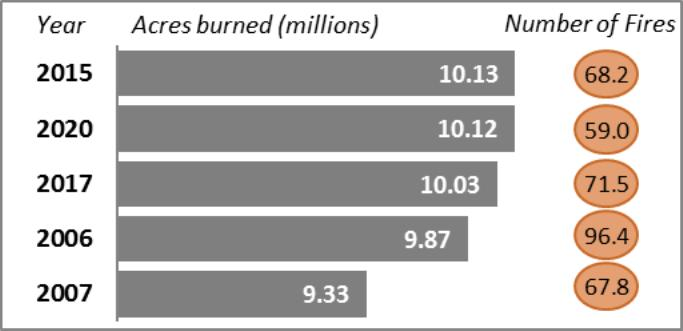

In [ ]:
plt_img_base64(r['images'][0])

In [ ]:
from operator import itemgetter
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_core.messages import HumanMessage

def multimodal_prompt_function(data_dict):
    """
    Create a multimodal prompt with both text and image context.

    This function formats the provided context from `data_dict`, which contains
    text, tables, and base64-encoded images. It joins the text (with table) portions
    and prepares the image(s) in a base64-encoded format to be included in a message.

    The formatted text and images (context) along with the user question are used to
    construct a prompt for GPT-4o
    """
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text and tables for analysis
    text_message = {
        "type": "text",
        "text": (
            f"""You are an analyst tasked with understanding detailed information and trends
                from text documents, data tables, and charts and graphs in images.
                You will be given context information below which will be a mix of text, tables,
                and images usually of charts or graphs.
                Use this information to provide answers related to the user question.
                Analyze all the context information including tables, text and images to generate the answer.
                Do not make up answers, use the provided context documents below
                and answer the question to the best of your ability.

                User question:
                {data_dict['question']}

                Context documents:
                {formatted_texts}

                Answer:
            """
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]


# Create RAG chain
multimodal_rag = (
        {
            "context": itemgetter('context'),
            "question": itemgetter('input'),
        }
            |
        RunnableLambda(multimodal_prompt_function)
            |
        chatgpt
            |
        StrOutputParser()
)

# Pass input query to retriever and get context document elements
retrieve_docs = (itemgetter('input')
                    |
                retriever_multi_vector
                    |
                RunnableLambda(split_image_text_types))

# Below, we chain `.assign` calls. This takes a dict and successively
# adds keys-- "context" and "answer"-- where the value for each key
# is determined by a Runnable (function or chain executing at runtime).
# This helps in also having the retrieved context along with the answer generated by GPT-4o
multimodal_rag_w_sources = (RunnablePassthrough.assign(context=retrieve_docs)
                                               .assign(answer=multimodal_rag)
)

In [ ]:
# Run RAG chain
query = "Tell me detailed statistics of the top 5 years with largest wildfire acres burned"
response = multimodal_rag_w_sources.invoke({'input': query})
response

{'input': 'Tell me detailed statistics of the top 5 years with largest wildfire acres burned',
 'context': {'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFLAqsDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD0Dwx4Y07WdHF7eiVp2kYEiTGcVs/8IHon9yf/AL+mjwH/AMiy

In [ ]:
def multimodal_rag_qa(query):
    response = multimodal_rag_w_sources.invoke({'input': query})
    print('=='*50)
    print('Answer:')
    display(Markdown(response['answer']))
    print('--'*50)
    print('Sources:')
    text_sources = response['context']['texts']
    img_sources = response['context']['images']
    for text in text_sources:
        display(Markdown(text))
        print()
    for img in img_sources:
        plt_img_base64(img)
        print()
    print('=='*50)


Answer:


Based on the provided data, here are the detailed statistics for the top five years with the largest wildfire acres burned:

1. **2015**
   - Acres Burned: 10.13 million
   - Number of Fires: 68,200

2. **2020**
   - Acres Burned: 10.12 million
   - Number of Fires: 59,000

3. **2017**
   - Acres Burned: 10.03 million
   - Number of Fires: 71,500

4. **2006**
   - Acres Burned: 9.87 million
   - Number of Fires: 96,400

5. **2007**
   - Acres Burned: 9.33 million
   - Number of Fires: 67,800

These statistics highlight the years with the most significant wildfire activity in terms of acreage burned since 1960.

----------------------------------------------------------------------------------------------------
Sources:


Figure 2. Top Five Years with Largest Wildfire Acreage Burned Since 1960

Table 1. Annual Wildfires and Acres Burned

Wildfire statistics help illustrate past U.S. wildfire activity. Nationwide data compiled by the National Interagency Coordination Center (NICC) indicate that the number of annual wildfires is variable but has decreased slightly over the last 30 years. The number of acres affected annually, while also variable, generally has increased (see Figure 1). Since 2000, an annual average of 70,025 wildfires have burned an annual average of 7.0 million acres. The acreage figure is more than double the average annual acreage burned in the 1990s (3.3 million acres), although a greater number of fires occurred annually in the 1990s on average (78,600).

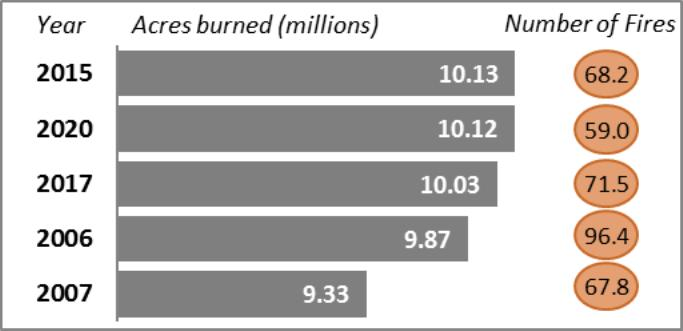

In [ ]:
query = "Tell me detailed statistics of the top 5 years with largest wildfire acres burned"
multimodal_rag_qa(query)

In [ ]:
# Run RAG chain
query = "Tell me about the percentage of residences burned by wildfires in 2022"
multimodal_rag_qa(query)

Answer:


In 2022, 46% of the structures burned by wildfires were residences. This percentage is derived from the data provided in the table, which shows the percentage of residences among the structures burned for each year from 2019 to 2022. In 2022, there were 2,717 structures burned, and 46% of these were residences.

----------------------------------------------------------------------------------------------------
Sources:


|  | 2019 | 2020 | 2021 | 2022 |
| :--- | :--- | :--- | :--- | :--- |
| Structures Burned | 963 | 17,904 | 5,972 | 2,717 |
| % Residences | 46% | 54% | 60% | 46% |


Of the 1.6 million wildfires that have occurred since 2000, 254 exceeded 100,000 acres burned and 16 exceeded 500,000 acres burned. A small fraction of wildfires become catastrophic, and a small percentage of fires accounts for the vast majority of acres burned. For example, about 1% of wildfires become conflagrations—raging, destructive fires—but predicting which fires will “blow up” into conflagrations is challenging and depends on a multitude of factors, such as weather and geography. There have been 1,041 large or significant fires annually on average from 2018 through 2022. In 2022, 2% of wildfires were classified as large or significant (1,289); 45 exceeded 40,000 acres in size, and 17 exceeded 100,000 acres. For context, there were fewer large or significant wildfires in 2021 (943) but more in 2017 (1,409).

From 2013 to 2022, there were an average of 61,410 wildfires annually and an average of 7.2 million acres impacted annually. In 2022, 68,988 wildfires burned 7.6 million acres. Over 40% of those acres were in Alaska (3.1 million acres).

As of June 1, 2023, around 18,300 wildfires have impacted over 511,000 acres this year.